In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob

# Create reviews

In [2]:
from src.ask import analyseText
from src.dbkg import consolidateBits

In [17]:
FILES = glob.glob("data/pages/*.html")
LS = []
for fi in FILES:
    with open(fi, "r") as f:
        LS.append(f.read().strip())
len(LS)

799

In [18]:
LS[:2]

['Ce projet vise à transformer les cours actuelles des écoles du 12e arrondissement en cours oasis pour les enfants.\nLa cour d’école étant un lieu central de la vie scolaire, il s’agit de repenser profondément cet espace commun et son usage, de partager la cour en de multiples zones pour que chaque groupe puisse s’y épanouir.\nCeci permettrait de créer de véritables espaces de liberté où les enfants pourraient jouer sur tous types de supports, se reposer à l’ombre, expérimenter de nouvelles activités, discuter et partager sereinement l\'espace entre filles et garçons. Tout cela dans le but d’améliorer les conditions de scolarité des élèves du 12e arrondissement.\nLes premières écoles concernées par le projet sont :\n* La maternelle Pommard\n* Le groupe scolaire du 56 rue de Picpus (écoles élémentaires A et B, école maternelle).\n\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOù en est ce projet ?\n\n\n\n"Ce projet d’aménagement de la cour de l’écol

In [20]:
allDFs = []
df = pd.read_parquet("data/xls/db.parquet.gzip")
items = df.Source.unique()

for te in LS:
    if te in items:
        N = len(df[df.Source == te])
        if N < 10:
            DD = analyseText( te.strip(), TypeOfItem="Activities", PBN=False, Source="BudgetParis", Place="Paris", Reviewed=False, MIN=10-N, ow=False, seed="..", MODEL="gpt-3.5-turbo" )
    allDFs.append(DD)
pd.concat(allDFs).reset_index(drop=True)

IndentationError: unexpected indent (835360689.py, line 9)

# Consolidate excels

In [10]:
df = consolidateBits(PATH="./data/xls/")
print(len(df),"reviews")

10786 reviews


In [11]:
from src.reportmgr import createExcel

In [12]:
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))

In [13]:
createExcel(df,"doc/WIP/Paris.xlsx","Texts from Paris","Paris","Review of Paris projects")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


'doc/WIP/Paris.xlsx'

# Creating visuals

In [14]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
items = df.Source.unique()
print(len(items))
df

1338


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10781,False,BudgetParis,Paris,Activities,data/pages/a7702d33fb22d3782d00ca00f45266f4.html,The text touches upon the preservation and enh...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,3,Promoting biodiversity in urban areas.,URL leads to specific webpage.,False
10782,False,BudgetParis,Paris,Activities,data/pages/a7702d33fb22d3782d00ca00f45266f4.html,The text emphasizes the crucial role of safety...,Resilience,Safety and security,Building,5,Safety and security for resilience.,URL leads to specific webpage.,False
10783,False,BudgetParis,Paris,Activities,data/pages/a7702d33fb22d3782d00ca00f45266f4.html,The text highlights the importance of responsi...,Responsible resource use,Economy and sustainable production and consump...,Neighbourhood,4,Responsible resource use for sustainability.,URL leads to specific webpage.,False
10784,False,BudgetParis,Paris,Activities,data/pages/a7702d33fb22d3782d00ca00f45266f4.html,The text emphasizes the promotion of social co...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Promotion of social cohesion through equality.,URL leads to specific webpage.,False


In [15]:
df.Place.unique()

array(['Paris', 'EU', 'Grenoble_Batch2'], dtype=object)

/home/kelu/projets/pariso37k/src/img.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/home/kelu/projets/pariso37k/src/img.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


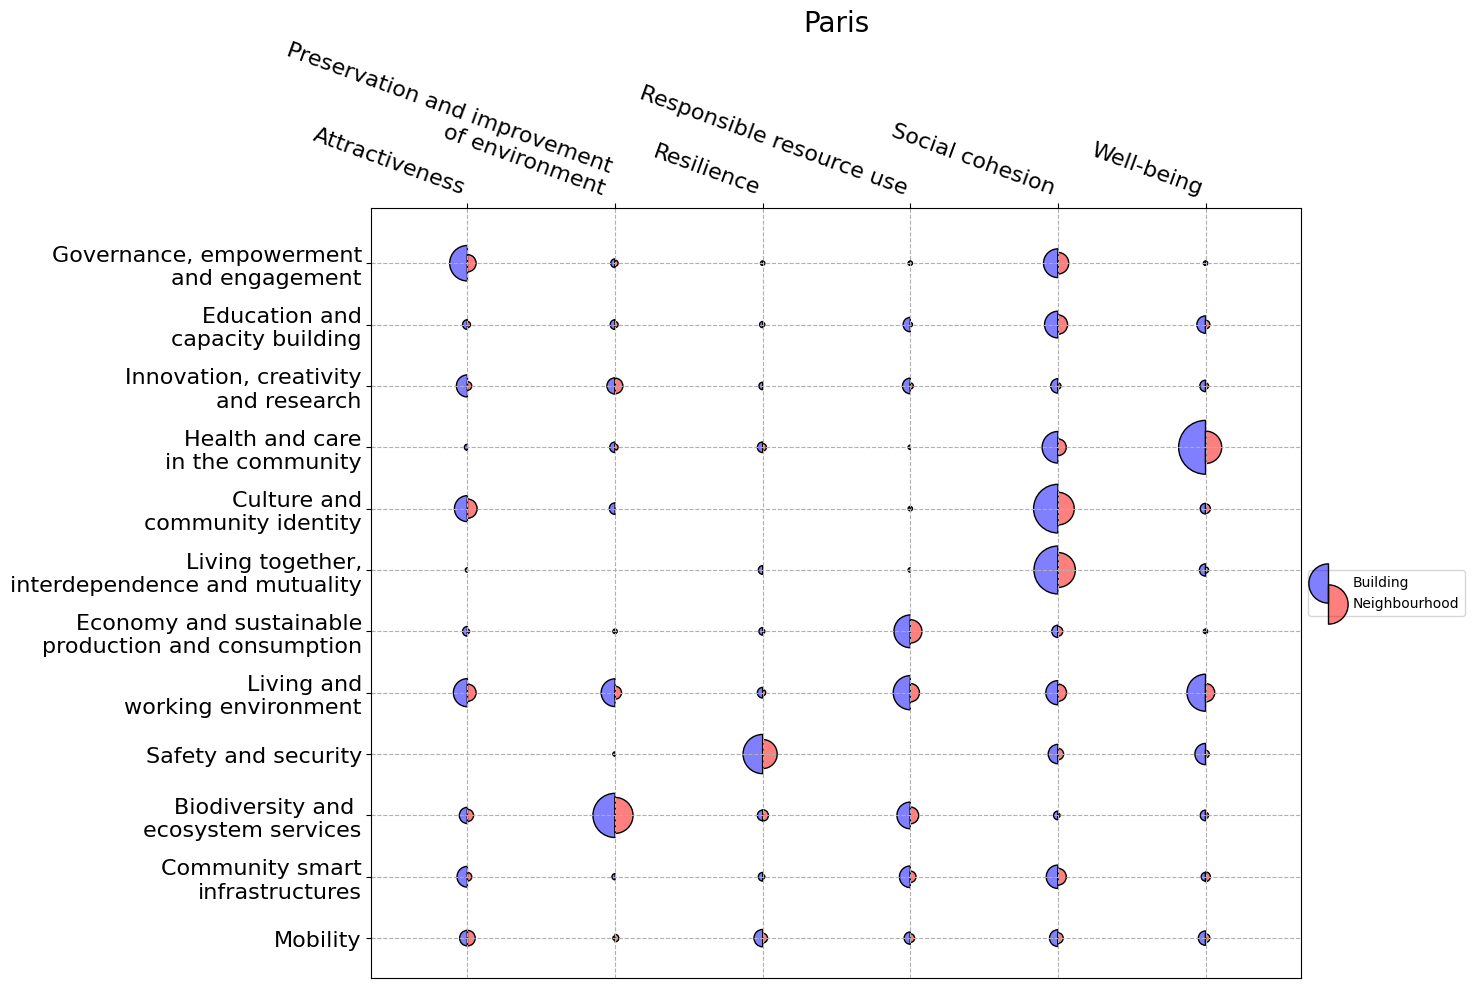

In [7]:
df = df[df.Place == "Paris"]

dfRef = pd.DataFrame(columns=df.columns)
dfUC = df

plt, ax = iImg.createImg(dfUC,dfRef,title="Paris")
plt.savefig("doc/WIP/Paris.png", bbox_inches='tight')
plt.savefig("doc/WIP/Paris.svg", bbox_inches='tight')

In [16]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")

# Create reports

In [31]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
projets['hash'] = projets['Lien URL vers le projet lauréat'].apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()) )
txts.columns = ["hash","Source","long"]
print(len(txts),len(df))
projets_h = projets.merge(txts,on="hash",how="left")
print(len(projets_h))
projets_hh = projets_h.merge(df,on="Source",how="right")
print(len(projets_hh))

799 1759
799
1759


In [42]:
fp='data/budget-participatif_operations-projets-gagnants-realisations.geojson'
gdf = gpd.read_file(fp)
cols = list(gdf.columns)
cols[0] = "Identifiant du projet lauréat"
gdf.columns = cols
P = gdf.merge(projets_hh,on="Identifiant du projet lauréat",how="right")
print(list(P.columns))
P = P.sort_values(by="long").dropna(how= "any", axis=1).reset_index(drop=True)
print(len(P),"----",len(P.Source.unique()),"texts reviewed.")
print(list(P.columns))
P.to_parquet("data/dataset.parquet.gzip",compression="gzip")
P.head(3)

['Identifiant du projet lauréat', 'titre_operation', 'titre_projet_gagnant', 'edition', 'thematique', 'direction_pilote_operation', 'type_financement_operation', 'adresse_operation', 'arrondissement_operation', 'longitude', 'latitude', 'operation_q_pop', 'quartier_operation', 'avancement_operation', 'debut_etudes_operation', 'lancement_procedure_operation', 'lancement_travaux_operation', 'livraison_prev_operation', 'ouverture_operation', 'identifiant_projet_gagnant', 'lien_projet_soumis', 'lien_projet_gagnant', 'direction_pilote_projet', 'budget_global_projet_gagnant', 'echelle_bp', 'adresse_projet_gagnant', 'arrondissement_projet_gagnant', 'projet_q_pop', 'avancement_projet', 'debut_etudes_projet', 'lancement_procedure_projet', 'lancement_travaux_projet', 'livraison_prev_projet', 'ouverture_projet', 'derniere_mise_a_jour_donnees', 'geo_point_2d', 'geometry', 'Lien URL vers le projet soumis au vote', 'Lien URL vers le projet lauréat', 'Edition', 'Titre du projet lauréat', 'Thématique',

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,13000,Budget participatif d’arrondissement,75011,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
1,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The project aims to enhance shared gardens and...,Attractiveness,Biodiversity and ecosystem services,Building,4,Creating green spaces with biodiversity.,"Revitalize shared gardens, add greenery.",False
2,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The creation of green spaces and shared garden...,Social cohesion,Living and working environment,Building,3,Creating green spaces benefits community.,"Revitalize shared gardens, add greenery.",False


# Documents

In [4]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [3]:
import pandas as pd
import hashlib, os

In [7]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))
IDS = list(df.ID.unique())
K = list(chunks(IDS, 10))
for k in range(len(K)):
    if not os.path.isfile("doc/WIP/Paris_"+str(k)+".xlsx"):
        DF = df[df.ID.isin(K[k])]
        createExcel(df,"doc/WIP/Paris_"+str(k)+".xlsx","Paris budget participatif","Paris","Review of the budget")
        print(k,"done")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


1 done


# Import and consolidate

In [ ]:
from src.impt import integrateReview

In [ ]:
path ="doc/WIP/.xlsx"
pdr = integrateReview(path)
pdr

NameError: name 'integrateReview' is not defined

In [1]:
import pandas as pd
import OAI

In [2]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1977,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1978,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1979,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [3]:
h = OAI.Helper("iso_ask", "./cache")
h.GOTOCACHE = "./cache/"

In [4]:
def shortSummary(x):
    return h.ask(
                    "Summarize in english the text below in up  to 5 words.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [5]:
def longSummary(x):
    return h.ask(
                    "Summarize in english the text below in up to  5 sentences.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [6]:
df.loc[df.Source_Title.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: shortSummary(x))


Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:43 --> 05/09/2024, 16:32:46
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:47 --> 05/09/2024, 16:32:48
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:49 --> 05/09/2024, 16:32:50
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:52 --> 05/09/2024, 16:32:53
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:54 --> 05/09/2024, 16:32:55
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:55 --> 05/09/2024, 16:32:56
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:07 --> 05/09/2024, 16:33:08
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:11 --> 05/09/2024, 16:33:12
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:15 --> 05/09/2024, 16:33:16
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:18 --> 05/09/2024, 16:33:19
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:21 --> 05/09/2024, 16:33:22
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:22 --> 05/09/2024, 16:33:23
Processing with gpt-3.5-turbo :	 05/09/2024, 16:33:2

In [7]:
SUMMARIES = [] 
for src in df.Source.unique():
    SUMMARIES.append([src,longSummary(src)])
SUMMARIES = pd.DataFrame(SUMMARIES,columns=["Source","SummaryEN"])

Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:12 --> 05/09/2024, 16:34:14
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:14 --> 05/09/2024, 16:34:18
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:18 --> 05/09/2024, 16:34:22
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:22 --> 05/09/2024, 16:34:26
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:26 --> 05/09/2024, 16:34:31
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:31 --> 05/09/2024, 16:34:36
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:36 --> 05/09/2024, 16:34:42
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:42 --> 05/09/2024, 16:34:45
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:46 --> 05/09/2024, 16:34:50
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:50 --> 05/09/2024, 16:34:53
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:53 --> 05/09/2024, 16:34:56
Processing with gpt-3.5-turbo :	 05/09/2024, 16:34:56 --> 05/09/2024, 16:35:00
Processing with gpt-3.5-turbo :	 05/09/2024, 16:35:0

KeyboardInterrupt: 

In [ ]:
DF = df.merge(SUMMARIES,on="Source",how="left")
DF

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,SummaryEN
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False,Opening coworking space at former train station.
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False,Opening coworking space at former train station.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1755,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1756,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1757,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False,Equipping schools with digital boards.


In [ ]:
DF.to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")